# _Neural Networks_

This is an [jupyter](http://jupyter.org) notebook.
Lectures about Python, useful both for beginners and experts, can be found at http://scipy-lectures.github.io.

Open the notebook by (1) copying this file into a directory, (2) in that directory typing 
jupyter-notebook
and (3) selecting the notebook.

***
Written By: **Riddhish Bhalodia**
***

In this exercise, we will learn about different neural network concepts. There are few prerequisites of probability and machine learning.

## The Perceptron Algorithm

It is one of the example of a linear discriminant model and used for two-class clustering / separation. In this model the input bector **x** is transformed using a fixed non-linear transformation. So starting from generalized model of linear regression we have

$$ y(\textbf{x}) = \textbf{w}^T\phi(\textbf{x})$$

Now in perceptron all we do is pass this linear regression model through a non-linear activation function as follows

$$y(\textbf{x}) = f(\textbf{w}^T\phi(\textbf{x})) \quad \quad \quad (1)$$

Here, $f(.)$ is given by 
$$
f(a) = \left\{
  \begin{array}{ll}
  -1 & \quad a < 0 \\
   1 & \quad a \geq 0
   \end{array}
   \right.
$$

Now, as we have two classes $\mathcal{C}_1$ and $\mathcal{C}_2$ so we define a <u>target variable t</u> which takes the values +1 and -1 for $\mathcal{C}_1$ and $\mathcal{C}_2$ respectively. Now we need to determine the parameters **w**, for that we need to define an error function which we have to minimize.

A natural choice for the error function is total number of misclassified patterns, however this causes some problems in the learning algorithm. Hence we propose an alternate error function called the *perceptron criterion* given by 

$$ E_p(\textbf{w}) = - \sum \limits _{n \in \mathcal{M}} \textbf{w}^T \phi (\textbf{x}_n) t_n \quad \quad \quad (2)$$

Here, $\mathcal{M}$ denotes the set of all the misclassified patterns, the reasoning behind this functional can be found Christopher M Bishop's book [here](http://www.springer.com/gp/book/9780387310732) :D

### Trivial example

Here we will simplate a trivial example in the case of a 2D data within the space [-1,1] x [-1,1], and we will asumme that $\phi(x_n) = x_n \quad \forall x_n$. We first need to generate the data

In [5]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# now we genrate the data
N = 30
x = np.zeros(N, dtype=np.float64)
y = np.zeros(N, dtype=np.float64)
for k in range(N):
    x[k], y[k] = [np.random.uniform(-1,1) for i in range(2)]
    
a = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
c = np.random.uniform(-1,1)
label = np.ones(N) # stores the labels for two classes, 1 for C1 and -1 for C2
xa = []
ya = []
xb = []
yb = []
N1 = 0
N2 = 0

# the random line divides the points into two classes of size N1 and N2
for k in range(N):
    temp = a*x[k] + b*y[k] + c
    if temp > 0:
        xa.append(x[k])
        ya.append(y[k])
        N1 += 1
    else:
        label[k] = -1
        xb.append(x[k])
        yb.append(y[k])
        N2 += 1

Now we plot the two classes as a scatter plot!

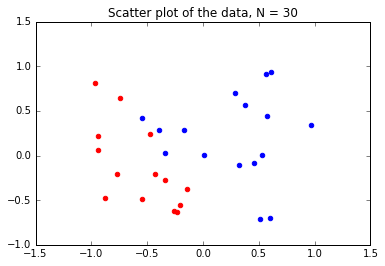

In [6]:
plt.scatter(xa, ya, color = 'b')
plt.hold(True)
plt.scatter(xb, yb, color = 'r')
plt.title('Scatter plot of the data, N = 30')

Now we want to classify this synthetic data using the perceptron model which will be trained using this data, and then we will test using the same data (this is called, self classification test). To proceed further we first need to train our perceptron model using the theory above.

Here the dimention of weight vector $\textbf{w}$ is 3 (as we just need to estimate a line). So we initilize the parameters as ones. 

In [10]:
w = np.ones(3, dtype=np.float64) # the weights
iter_max = 2000 # maximum number of iterations
error = 1000.0 # randomly initilize the classification error
it = 0 # variable to store the iteration number
eta = 0.001 # the step size (try varying this)
classified_labels = np.ones(N)

Now how do we solve for the parameters. Easy, we apply simple gradient descent on the _objective function_ (the function of the parameters to be estimated, which is to be minimized). So we take the derivative of the equation (2) and we get

$$ \textbf{w}^{(l+1)} = \textbf{w}^{(l)} + \eta \sum \limits_{n \in \mathcal{M}} \phi (\textbf{x}_n) t_n $$

So now we start coding the actual parameter estimation part. 

In [11]:
while (error != 0 and it < iter_max):
    # Update Rules
    temp_vec = np.zeros(3, dtype=np.float64)
    temp = np.zeros(3, dtype=np.float64)
    for i in range(N):
        if label[i] != classified_labels[i]:
            temp += eta * np.array([x[i], y[i], 1]) * label[i]
    w += temp
    # recompute the classification
    for i in range(N):
        temp1 = w[0]*x[i] + w[1]*y[i] + w[2]
        if temp1 > 0:
            classified_labels[i] = 1
        else:
            classified_labels[i] = -1
            
    # compute the misclassification error
    error = 0
    for i in range(N):
        temp1 = w[0]*x[i] + w[1]*y[i] + w[2]
        if label[i] != classified_labels[i]:
            error += - label[i] * temp1
    
    w = w / np.linalg.norm(w, ord=2)
    it +=1

print("Done!")

Done!


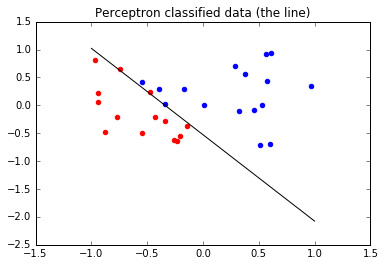

In [12]:
x = np.linspace(-1,1,100)
y = -(w[0] * x + w[2]) / w[1]
plt.scatter(xa, ya, color = 'b')
plt.hold(True)
plt.scatter(xb, yb, color = 'r')
plt.plot(x,y, color='k')
plt.title('Perceptron classified data (the line)')

We can see that this perceptron model classifies the data very well :) lest check how close the weights are to the actual line we took to generate the data

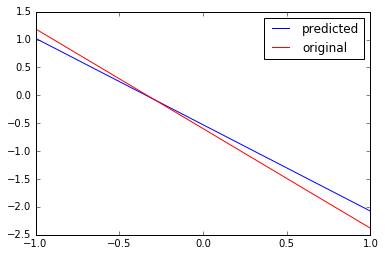

In [13]:
x = np.linspace(-1,1,100)
y = -(w[0] * x + w[2]) / w[1]
plt.plot(x,y,color='b')
x = np.linspace(-1,1,100)
y = -(a * x + c) / b
plt.hold(True)
plt.plot(x,y,color='r')
plt.legend(['predicted', 'original'])

Try changing the N and see how the prediction changes! Now we will move on to see how this will help us in neural networks. Also if the system does not work, then try changing the eta and iterations (they may need to be tuned as we are generating different random data each time). Also the lines need not be equal as the same partition can be achieved with different lines :)

## Multilayer Perceptron

### Brief Intro to Neural Networks

In very short and sweet terms neural networks aims at making mathematical constructs for information processing mimicing biological systems. Disregarding several constraints that actual biological construct gives us, we can use the core idea of neural networks for many pattern recognition applications, the following aspects of the theory are taken from Christopher Bishop's book.

### The most basic..

The _multilayer perceptron_ that we are going to discuss now is one of the most simplest and widely used models for neural networks, it's also known as _Feed Forward Networks_. 
The goal is to extend the regression model by making the $\phi (x_j)$ depend on some parameters which are to be estimated along with the set of weights $\{w\}_j$. So by (3) we now use simple linear comination to describe the neural network in terms of series of functional transformations

(A) M linear combinations of the inputs $(x_1,...,x_D)$ to generate activations

$$a_j = \sum \limits_{i=1}^D w_{ji}^{(1)}x_i + w_{j0}^{(1)} \quad \quad \quad (3)$$

The superscript (1) denotes the first layer of the neural network.

(B) Transformation of activations by a _differentiable, non-linear activation function_ h(.)

$$z_i = h(a_i) \quad \quad \quad (4)$$

these $z_i$ are the _hidden units_ and the two equations (3) and (4) combine to what looks like a perceptron model. 

(C) Similar to inputs we have output activations which are constructed by linearly combining the hidden units

$$a_k = \sum \limits_{j=1}^{M} w_{kj}^{(2)}z_j + w_{k0}^{(2)} \quad \quad \quad (5)$$

(D) Lastly the output activations passed through a non-linear activation function gives the network outputs

$$y_k = \sigma (a_k) \quad \quad \quad (6)$$

These steps can be represented as the following figure (Taken from Pattern Recognition and Machine Learning by Christopher Bishop)

 <figure>
  <img src="neural_net.jpg" width="404" height="328">
  <figcaption><center>Fig1. - Two hidden layer neural network (example of multi-layer perceptron)</center></figcaption>
</figure>

The model is _forward propogating_, and once we put the $x_0 = 1$ and join the bias weight to the set of weights we can see why this looks like a multilayer perceptron model. The key difference is that hidded units use continious (sigmoidal) non-linearities which makes the overall network function (by combimining all the steps) differetiable wrt the parameters, which helps in smooth training as we will see further.

Now all we need to do to train this model is the following two steps (this is true for most of the cases)
* Find the gradient of the error function wrt to the paramenters
* Update the parameters using an update scheme (we usually use gradient descent for this)

Well the trouble is a first step, we need to come up with an efficient way to compute the gradients of the neural network, for this be will use an algorithm whic is used in normal network to transmit messages backword and forward, and it's called **backward propogation** or **backpropogation**

## Error Back Propogation

_Goal is to have an efficient technique to compute gradients of the error functionals effectively, which when used with gradient descent allows us to train the neural network_

We will derive the back propogation algorithm for a general network having a arbitary _feed-forward topology_ and arbitary _non-linear differentiable activation functions_.

The error function defined by maximum likelihood estimate for i.i.d data is a sum of individual error functions!

$$E(\textbf{w}) = \sum \limits_{n=1}^N E_n(\textbf{w}) \quad \quad \quad (7)$$

In a general feed-forward network the each hidden unit computes a weighted sum of it's inputs in the form

$$a_j = \sum \limits_i w_{ji}z_i \quad \quad \quad (8)$$

$z_i$ is activation of inputs / units which sends connection to unit j and $w_{ji}$ is weight of that connection. Now h(.) is a non-linear function which computes the activations of the next layer. Vizualize this as a network

$$z_j = h(a_j) \quad \quad \quad (9)$$

Now moving into the actual training phase, for each pattern in the training set we shall suppose we have all the input vectors and activations already computed (this process in called _forward propogation_).
So computing gradients we take the derivative of $E_n$ wrt $w_{ji}$

$$\frac{\partial E_n}{\partial w_{ji}} = \frac{\partial E_n}{\partial a_j}\frac{\partial a_j}{\partial w_{ji}} \quad \quad \quad (10)$$

Lets name $\delta_j = \frac{\partial E_n}{\partial a_j}$, these $\delta_j$ are called _errors_. On top of this we know that from eq (8) $\frac{\partial a_j}{\partial w_{ji}} = z_i$. Hence, we have

$$\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i \quad \quad \quad (11)$$

Now for computing the gradient we only need to find the errors ($\delta_j$) for output and hidden units. For the output units we have (think about this intuitively)

$$\delta_k = y_k - t_k \quad \quad \quad (12)$$


Now let us vizualize how our network looks like again
<figure>
<img src="net.png"></img>
<figcaption><center>Fig2. - Error flow along the network</center></figcaption>
</figure>
By this the hidden units will be of the form 

$$\delta_j = \frac{\partial E_n}{\partial a_j} = \sum \limits_{k} \frac{\partial E_n}{\partial a_k} \frac{\partial a_k}{\partial a_j} \quad \quad \quad (13)$$

This means that the variations in of $a_j$ give rise to the variations in the error function only through the variations in variable $a_k$.
Now by using equations (13), (8) and (9) we can arrive at the _backpropogation formula_
***
$$ \delta_j = h'(a_j)\sum \limits_{k} w_{kj}\delta_k \quad \quad \quad (14)$$
***

### Summary

1) Apply the input vector $x_n$ to network and forward propogate to find all the activations of all the hidden units and output units

2) Evaluate $\delta_k$ for all output units by equation 12

3) Back propogate the $\delta$'s by equation 14, getting $\delta_i$ for each hidden unit

4) Use $\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i$ to compute derivatives

It's a fairly intuitive algorithm once you understand that how the error "flows" backward from the network. So we will start implementing this now, but first let me describe the application.

We will implement a simple _two layer neural network_ (one hidden layer as in Fig 1) in form of a class that then can be used for several applications! Also we will have the output activation function as identity, i.e. $y_k = a_k$, and the hidden layer activation function as 

$h(a) = tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}}$

So let's get started! First we define some simple functions for computing the activation function and it's derivative

In [14]:
def tanh(x):
    return np.tanh(x)

def tanh_derv(x):
    # work the math out
    return 1.0 - np.tanh(x)**2

Now lets start with the class definition

In [19]:
class neural_network:
    def __init__(self, layers):
        """
        layers: A list containing the number of units in each layer.
                Should be at least two values (this also includes the input layer)
        """
        self.act_fn = tanh # the activation function of the hidden layers
        self.act_fn_derv = tanh_derv # the derivative of the activation function of the hidden layers
        self.weights = [] # list of the weights
        # now we need to initialize these weights
        # We have to keep in mind that every layer except for the output will have one extra bias unit
        # we initialize the weights randomly between [-0.5,0.5]
        
        for i in range(1,len(layers) - 1):
            self.weights.append(0.5 * (2 * np.random.random([layers[i-1] + 1, layers[i] + 1]) - 1))
        
        # and for between the last hidden layer and the output layer
        self.weights.append(0.5 * (2 * np.random.random([layers[i] + 1, layers[i + 1]]) - 1))

So essentially the weights in the class is the list of arrays of weights between two layers, for example if the layers = [2,3,2], that will result in the figure 1 exactly. we will have weights[0] = 3x4 matrix and weights[1] = 4x2 matrix (refer to the figure one and see how this makes sense).

Now we move to training this neural network, where we will apply an algorithm called _stochastic gradient descent_ its is same as standard gradient descent except for the fact that it makes an update to the weight vector using a single data point at a time. These data points are either selected by cycling through the data or choosing randomly. So we have

$$\textbf{w}^{(\tau + 1)} = \textbf{w}^{(\tau)} - \eta \nabla E_n(\textbf{w}^{(\tau)}) $$